# PROJECT : Message Spam or Non-spam

**Import required libraries**

In [1]:
import numpy as np
import pandas as pd
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
tr=pd.read_csv('/content/SMS_train (1).csv',encoding='ISO-8859-1')
tr

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam
...,...,...,...
952,953,hows my favourite person today? r u workin har...,Non-Spam
953,954,How much you got for cleaning,Non-Spam
954,955,Sorry da. I gone mad so many pending works wha...,Non-Spam
955,956,Wat time ü finish?,Non-Spam


In [3]:
te=pd.read_csv('/content/SMS_test (2).csv',encoding='ISO-8859-1')
te

,S. No.,Message_body,Label
0,1,"UpgrdCentre Orange customer, you may now claim...",Spam
1,2,"Loan for any purpose £500 - £75,000. Homeowner...",Spam
2,3,Congrats! Nokia 3650 video camera phone is you...,Spam
3,4,URGENT! Your Mobile number has been awarded wi...,Spam
4,5,Someone has contacted our dating service and e...,Spam
...,...,...,...
120,121,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
121,122,Try to do something dear. You read something f...,Non-Spam
122,123,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
123,124,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam


**Concatination two tables**

In [4]:
df=pd.concat([tr,te],ignore_index=True)
df

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam
...,...,...,...
1077,121,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
1078,122,Try to do something dear. You read something f...,Non-Spam
1079,123,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
1080,124,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam


In [5]:
df.head()

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam


In [6]:
df.tail()

,S. No.,Message_body,Label
1077,121,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
1078,122,Try to do something dear. You read something f...,Non-Spam
1079,123,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
1080,124,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam
1081,125,Great. Have a safe trip. Dont panic surrender ...,Non-Spam


In [7]:
df['Message_body'][0]

'Rofl. Its true to its name'

In [8]:
df.dtypes

S. No.           int64
Message_body    object
Label           object
dtype: object

**Checking missing values**

In [9]:
df.isna().sum()

S. No.          0
Message_body    0
Label           0
dtype: int64

**Find Value count and Data Visualization**

In [10]:
df['Label'].value_counts()

Non-Spam    884
Spam        198
Name: Label, dtype: int64

<Axes: xlabel='Label', ylabel='count'>

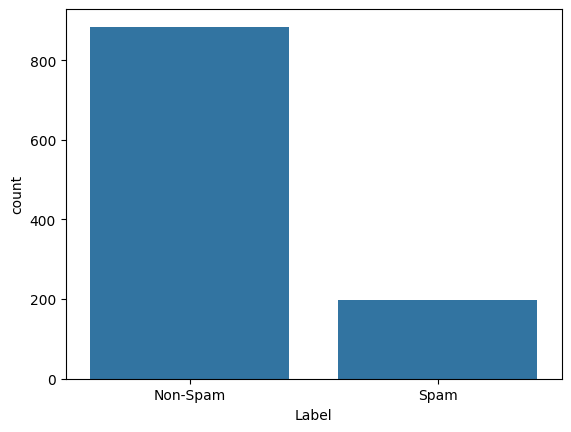

In [11]:
sns.countplot(x='Label',data=df)

**Remove unwanted columns**

In [12]:
df.drop(['S. No.'],axis=1,inplace=True)
df

,Message_body,Label
0,Rofl. Its true to its name,Non-Spam
1,The guy did some bitching but I acted like i'd...,Non-Spam
2,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,Will ü b going to esplanade fr home?,Non-Spam
4,This is the 2nd time we have tried 2 contact u...,Spam
...,...,...
1077,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
1078,Try to do something dear. You read something f...,Non-Spam
1079,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
1080,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam


**Replace String to Numeric**

In [13]:
df['Label']=df['Label'].map({'Non-Spam':0,'Spam':1})
df

,Message_body,Label
0,Rofl. Its true to its name,0
1,The guy did some bitching but I acted like i'd...,0
2,"Pity, * was in mood for that. So...any other s...",0
3,Will ü b going to esplanade fr home?,0
4,This is the 2nd time we have tried 2 contact u...,1
...,...,...
1077,7 wonders in My WORLD 7th You 6th Ur style 5th...,0
1078,Try to do something dear. You read something f...,0
1079,Sun ah... Thk mayb can if dun have anythin on....,0
1080,"SYMPTOMS when U are in love: ""1.U like listeni...",0


**Download for NLP**

In [14]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

**Assigning to a variable output column**

In [15]:
sms=df.Message_body
sms

0                              Rofl. Its true to its name
1       The guy did some bitching but I acted like i'd...
2       Pity, * was in mood for that. So...any other s...
3                    Will ü b going to esplanade fr home?
4       This is the 2nd time we have tried 2 contact u...
                              ...                        
1077    7 wonders in My WORLD 7th You 6th Ur style 5th...
1078    Try to do something dear. You read something f...
1079    Sun ah... Thk mayb can if dun have anythin on....
1080    SYMPTOMS when U are in love: "1.U like listeni...
1081    Great. Have a safe trip. Dont panic surrender ...
Name: Message_body, Length: 1082, dtype: object

**Tokenization using TweetTokenizer**

In [16]:
#Tokenization
from nltk import TweetTokenizer
tk=TweetTokenizer()
sms=sms.apply(lambda x:tk.tokenize(x)).apply(lambda x:" ".join(x))
sms

0                             Rofl . Its true to its name
1       The guy did some bitching but I acted like i'd...
2       Pity , * was in mood for that . So ... any oth...
3                   Will ü b going to esplanade fr home ?
4       This is the 2nd time we have tried 2 contact u...
                              ...                        
1077    7 wonders in My WORLD 7th You 6th Ur style 5th...
1078    Try to do something dear . You read something ...
1079    Sun ah ... Thk mayb can if dun have anythin on...
1080    SYMPTOMS when U are in love : " 1 . U like lis...
1081    Great . Have a safe trip . Dont panic surrende...
Name: Message_body, Length: 1082, dtype: object

**Remove Special characters**

In [17]:
#Remove special charachter
sms=sms.str.replace('[^a-zA-Z0-9]+',' ')
sms

<ipython-input-17-8c82d3e27576>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  sms=sms.str.replace('[^a-zA-Z0-9]+',' ')


0                               Rofl Its true to its name
1       The guy did some bitching but I acted like i d...
2       Pity was in mood for that So any other suggest...
3                      Will b going to esplanade fr home 
4       This is the 2nd time we have tried 2 contact u...
                              ...                        
1077    7 wonders in My WORLD 7th You 6th Ur style 5th...
1078    Try to do something dear You read something fo...
1079    Sun ah Thk mayb can if dun have anythin on Thk...
1080    SYMPTOMS when U are in love 1 U like listening...
1081     Great Have a safe trip Dont panic surrender all 
Name: Message_body, Length: 1082, dtype: object

In [18]:
from nltk.tokenize import word_tokenize
sms=sms.apply(lambda x:" ".join([w for w in word_tokenize(x) if len(w)>=3]))
sms

0                                  Rofl Its true its name
1       The guy did some bitching but acted like inter...
2            Pity was mood for that any other suggestions
3                               Will going esplanade home
4       This the 2nd time have tried contact have won ...
                              ...                        
1077    wonders WORLD 7th You 6th style 5th smile 4th ...
1078      Try something dear You read something for exams
1079    Sun Thk mayb can dun have anythin Thk have boo...
1080    SYMPTOMS when are love like listening songs ge...
1081        Great Have safe trip Dont panic surrender all
Name: Message_body, Length: 1082, dtype: object

**Stemming using SnowballStemmer**

In [19]:
#Stemming
from nltk.stem import SnowballStemmer
stemmer=SnowballStemmer('english')
sms=sms.apply(lambda x:[stemmer.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda x:" ".join(x))
sms

0                                    rofl it true it name
1       the guy did some bitch but act like interest b...
2                piti was mood for that ani other suggest
3                                   will go esplanad home
4       this the 2nd time have tri contact have won th...
                              ...                        
1077    wonder world 7th you 6th style 5th smile 4th p...
1078             tri someth dear you read someth for exam
1079    sun thk mayb can dun have anythin thk have boo...
1080    symptom when are love like listen song get sto...
1081          great have safe trip dont panic surrend all
Name: Message_body, Length: 1082, dtype: object

**Remove Stopwords**

In [20]:
#Remove stopwords
from nltk.corpus import stopwords
stop=stopwords.words('english')
sms=sms.apply(lambda x:[i for i in word_tokenize(x) if i not in stop]).apply(lambda x:" ".join(x))
sms

0                                          rofl true name
1       guy bitch act like interest buy someth els nex...
2                                   piti mood ani suggest
3                                        go esplanad home
4       2nd time tri contact 750 pound prize claim eas...
                              ...                        
1077    wonder world 7th 6th style 5th smile 4th perso...
1078                     tri someth dear read someth exam
1079    sun thk mayb dun anythin thk book lesson pilat...
1080    symptom love like listen song get stop see nam...
1081                   great safe trip dont panic surrend
Name: Message_body, Length: 1082, dtype: object

**Vectorization**

In [21]:
#Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
train_data=vec.fit_transform(sms)

In [22]:
print(train_data)

  (0, 1751)	0.5086856793431559
  (0, 2603)	0.5352804139572925
  (0, 2146)	0.6743246681420617
  (1, 1122)	0.1977601804079742
  (1, 1167)	0.32809784984076795
  (1, 2740)	0.22799692523276513
  (1, 1779)	0.26514476216742267
  (1, 972)	0.30392006451010634
  (1, 2331)	0.2751324774651613
  (1, 628)	0.2751324774651613
  (1, 1391)	0.3187189191538061
  (1, 1533)	0.2174075457753962
  (1, 353)	0.35437558793533497
  (1, 559)	0.3752334020731641
  (1, 1236)	0.26826339572857744
  (2, 2429)	0.5165656915002457
  (2, 418)	0.36716239650585775
  (2, 1708)	0.5469696796701571
  (2, 1930)	0.5469696796701571
  (3, 1308)	0.47434824349351795
  (3, 998)	0.7276196298199475
  (3, 1192)	0.4955435583228748
  (4, 2060)	0.24880867841085
  (4, 1756)	0.2883944867284856
  (4, 1674)	0.2570526577689625
  :	:
  (1079, 1852)	0.2706898396742334
  (1079, 1724)	0.2706898396742334
  (1079, 2434)	0.26153957460502464
  (1079, 1522)	0.24774213284441401
  (1079, 580)	0.2374366876682329
  (1079, 2524)	0.49548426568882803
  (1079, 1642

In [23]:
y=df['Label'].values
y

array([0, 0, 0, ..., 0, 0, 0])

In [24]:
x=train_data

**Split the data into Training & Testing data**

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

**Model Creation**
- knn
- Naive_bayes
- SVM

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
knn=KNeighborsClassifier(n_neighbors=7)
naive=MultinomialNB()
sv=SVC()
lst=[knn,naive,sv]
acc=[]

**Performance Evaluation**

In [27]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
for i in lst:
  print(i)
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  acc.append(accuracy_score(y_test,y_pred))
  print(confusion_matrix(y_test,y_pred))
  print(accuracy_score(y_test,y_pred))
  print(classification_report(y_test,y_pred))

KNeighborsClassifier(n_neighbors=7)
[[269   0]
 [ 54   2]]
0.8338461538461538
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       269
           1       1.00      0.04      0.07        56

    accuracy                           0.83       325
   macro avg       0.92      0.52      0.49       325
weighted avg       0.86      0.83      0.76       325

MultinomialNB()
[[269   0]
 [ 21  35]]
0.9353846153846154
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       269
           1       1.00      0.62      0.77        56

    accuracy                           0.94       325
   macro avg       0.96      0.81      0.87       325
weighted avg       0.94      0.94      0.93       325

SVC()
[[268   1]
 [ 24  32]]
0.9230769230769231
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       269
           1       0.97      0.57      0.72        56

**Visualize model comparison**

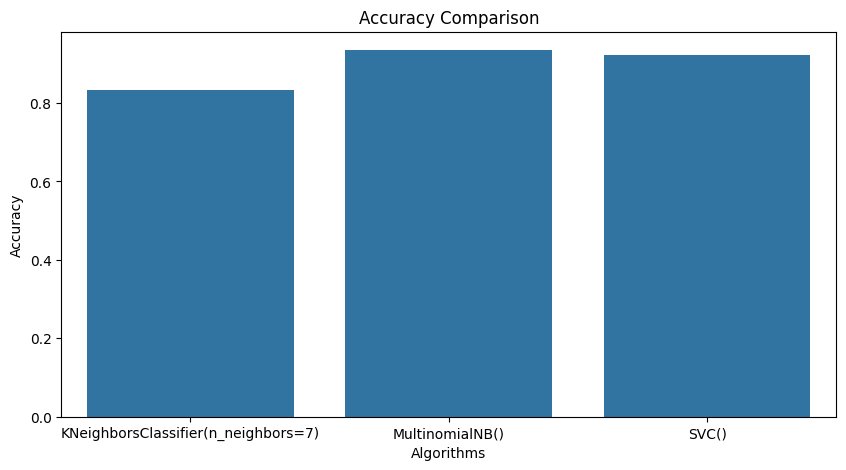

In [28]:
plt.figure(figsize=(10,5))
sns.barplot(x=lst,y=acc)
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.show()

In [37]:
max_acc=max(acc)
print('The best accuracy is :',max_acc)
print('The model with the best accuracy is:',lst[acc.index(max_acc)])

The best accuracy is : 0.9353846153846154
The model with the best accuracy is: MultinomialNB()


**Predictive System**

In [33]:
def predict_spam(message):
  message=re.sub('[^a-zA-Z0-9]+',' ',message)
  message=message.lower()
  message=word_tokenize(message)
  message=[stemmer.stem(word) for word in message if word not in stopwords.words('english')]
  message=' '.join(message)
  message_vec=vec.transform([message])
  prediction=naive.predict(message_vec)[0]
  if prediction==0:
    return 'Non-Spam'
  else:
    return 'Spam'

user_message=input("Enter a message: ")
prediction=predict_spam(user_message)
print("Prediction: ",prediction)

Enter a message: 7 wonders in My WORLD 7th You 6th Ur style 5th...
Prediction:  Non-Spam
